<a href="https://colab.research.google.com/github/Vattikolla/FMML-2024/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [28]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [29]:
def f(x):
    return x ** 2 + x + 1

In [30]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

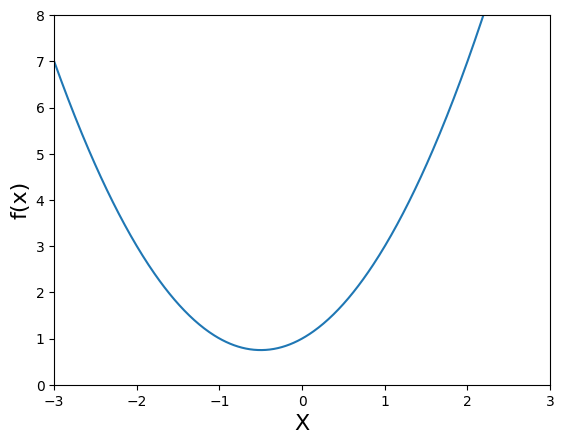

In [31]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [32]:
def df(x):
    return 2 * x + 1

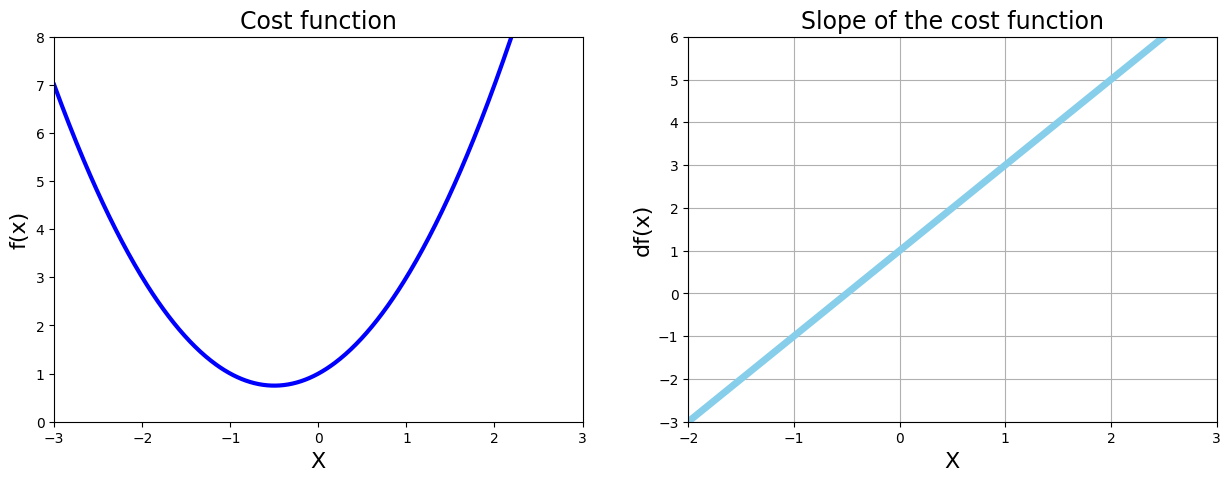

In [33]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [34]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell
# Define the function and its derivative
def f(x):
    # Example: Quadratic function f(x) = x^2
    return x**2

def df(x):
    # Derivative of f(x): df(x) = 2x
    return 2 * x

# Gradient Descent
new_x = 3  # Initial guess
previous_x = 0  # To store the previous value of x
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Convergence criteria

x_list = [new_x]  # Track all x values
slope_list = [df(new_x)]  # Track slopes (derivative values)

for n in range(500):  # Maximum number of iterations
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Compute the gradient using the derivative function
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update x using gradient descent formula
    step_size = abs(new_x - previous_x)  # Calculate step size

    x_list.append(new_x)  # Append new x to the list
    slope_list.append(df(new_x))  # [REQUIRED] Compute and append the new slope (derivative value)

    if step_size < precision:  # Convergence check
        print('Loop ran this many times:', n)
        break

# Results
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


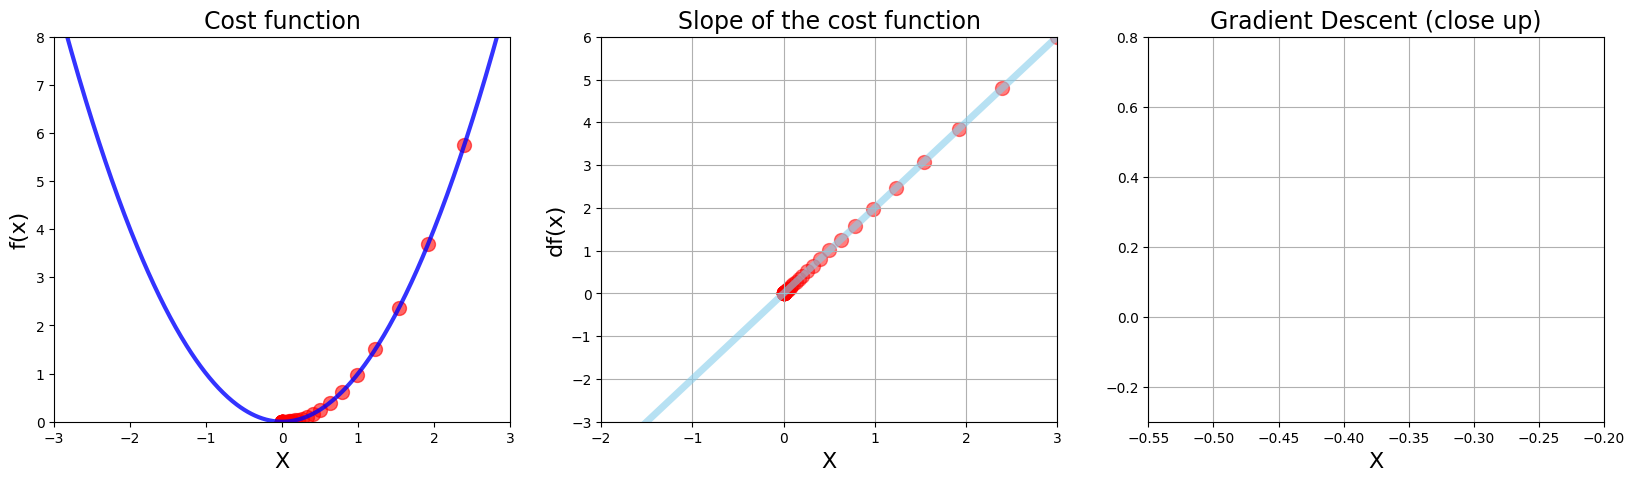

In [35]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

In [36]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
#########################
# Gradient Descent
new_x = 3  # Initial guess
previous_x = 0  # To store the previous value of x
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Convergence criteria

x_list = [new_x]  # Track all x values
slope_list = [df(new_x)]  # Track slopes (derivative values)

for n in range(500):  # Maximum number of iterations
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED] Compute the gradient using the derivative function
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED] Update x using gradient descent formula
    step_size = abs(new_x - previous_x)  # Calculate step size

    x_list.append(new_x)  # Append new x to the list
    slope_list.append(df(new_x))  # [REQUIRED] Compute and append the new slope (derivative value)

    if step_size < precision:  # Convergence check
        print('Loop ran this many times:', n)
        break

# Results
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


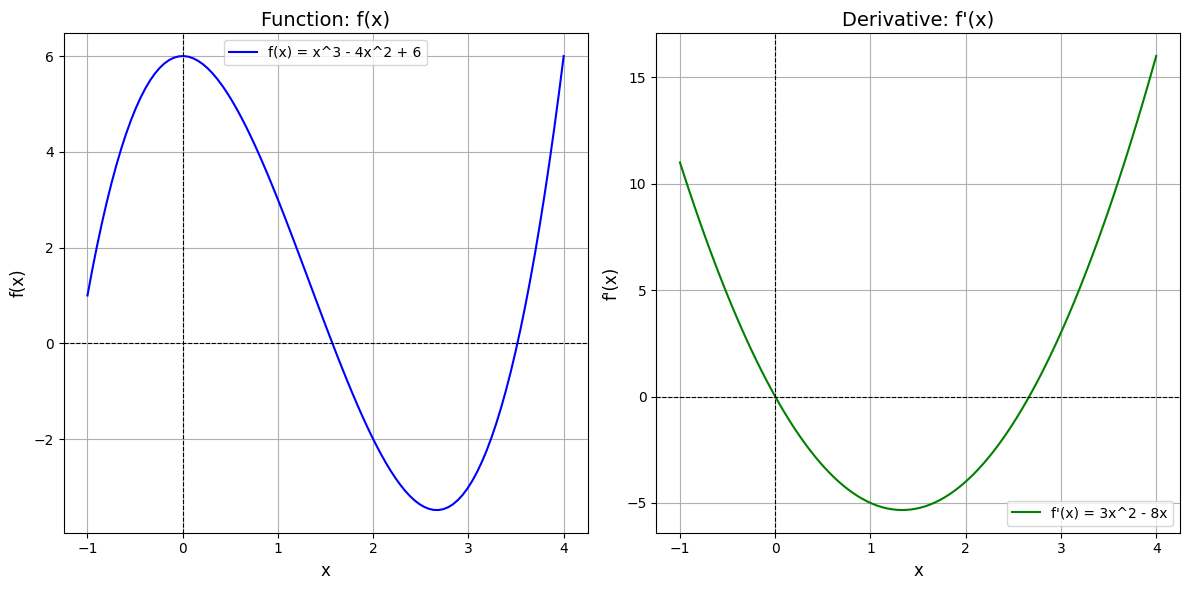

In [37]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    # Example: Cubic function f(x) = x^3 - 4x^2 + 6
    return x**3 - 4 * x**2 + 6

def df(x):
    # Derivative of f(x): df(x) = 3x^2 - 8x
    return 3 * x**2 - 8 * x

# Generate values for x
x_values = np.linspace(-1, 4, 100)  # Adjust range as needed

# Calculate function and derivative values
y_values = f(x_values)
dy_values = df(x_values)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the function
plt.subplot(1, 2, 1)
plt.plot(x_values, y_values, label="f(x) = x^3 - 4x^2 + 6", color='blue')
plt.title("Function: f(x)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend()

# Plot the derivative
plt.subplot(1, 2, 2)
plt.plot(x_values, dy_values, label="f'(x) = 3x^2 - 8x", color='green')
plt.title("Derivative: f'(x)", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f'(x)", fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Gradient Descent

In [38]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [39]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 2.6615293571687744
Number of steps: 47


In [41]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001

    Args:
        derivative_func: The derivative of the function to minimize.
        initial_guess: The starting point for the search.
        multiplier: The learning rate, controlling the step size.
        precision: The desired accuracy of the result.
        max_iter: The maximum number of iterations.

    Returns:
        A tuple containing the local minimum, the list of x values, and the list of slopes.
    """
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        # Check if the step size or the new_x value exceed a threshold
        if step_size < precision or abs(new_x) > 1e10:  # Add overflow check
            break
    return new_x, x_list, slope_list

SyntaxError: unterminated triple-quoted string literal (detected at line 30) (<ipython-input-41-d6d8639b15df>, line 13)

In [42]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

OverflowError: (34, 'Numerical result out of range')

In [ ]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

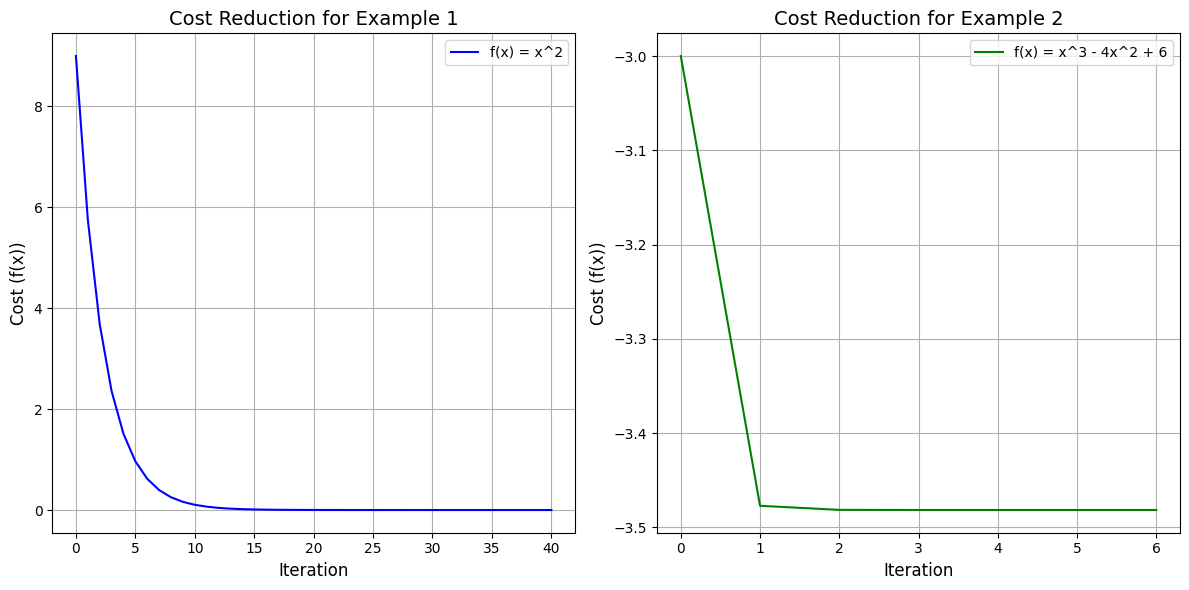

In [43]:
## TASK-4 : Code the same things as they were done for the first two examples
import matplotlib.pyplot as plt

# Define the first example: Quadratic function and its derivative
def f1(x):
    return x**2

def df1(x):
    return 2 * x

# Define the second example: Cubic function and its derivative
def f2(x):
    return x**3 - 4 * x**2 + 6

def df2(x):
    return 3 * x**2 - 8 * x

# Gradient Descent Function
def gradient_descent(func, derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_history = [x]  # Store all values of x for analysis
    cost_history = [func(x)]  # Store corresponding cost values (f(x))

    for i in range(max_iter):
        gradient = derivative_func(x)  # Calculate gradient
        new_x = x - multiplier * gradient  # Update x
        step_size = abs(new_x - x)  # Calculate step size

        x_history.append(new_x)
        cost_history.append(func(new_x))

        if step_size < precision:  # Stop if convergence is achieved
            break
        x = new_x

    return x_history, cost_history

# Parameters
initial_guess = 3
learning_rate = 0.1
precision = 0.0001
max_iterations = 500

# Run Gradient Descent for the first example
x_history1, cost_history1 = gradient_descent(f1, df1, initial_guess, learning_rate, precision, max_iterations)

# Run Gradient Descent for the second example
x_history2, cost_history2 = gradient_descent(f2, df2, initial_guess, learning_rate, precision, max_iterations)

# Plot Results
plt.figure(figsize=(12, 6))

# First example
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_history1)), cost_history1, label="f(x) = x^2", color='blue')
plt.title("Cost Reduction for Example 1", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Cost (f(x))", fontsize=12)
plt.grid(True)
plt.legend()

# Second example
plt.subplot(1, 2, 2)
plt.plot(range(len(cost_history2)), cost_history2, label="f(x) = x^3 - 4x^2 + 6", color='green')
plt.title("Cost Reduction for Example 2", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Cost (f(x))", fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#### Learning Rate

In [44]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

TypeError: gradient_descent() missing 2 required positional arguments: 'func' and 'precision'

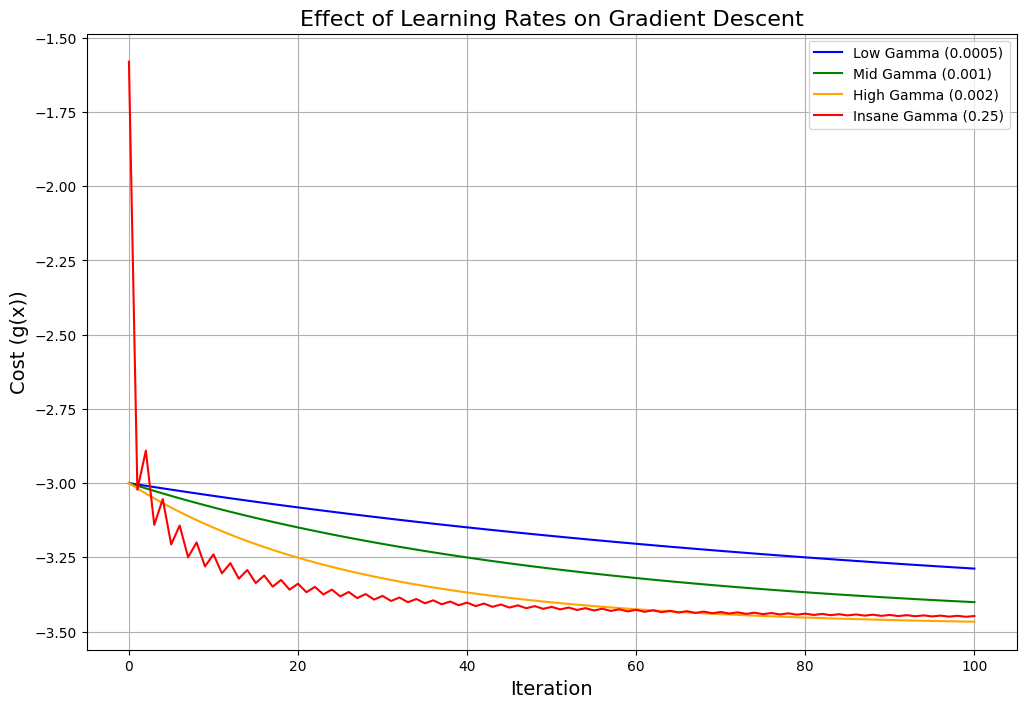

In [45]:

## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
import matplotlib.pyplot as plt

# Define the function and its derivative
def g(x):
    # Example: Cubic function g(x) = x^3 - 4x^2 + 6
    return x**3 - 4*x**2 + 6

def dg(x):
    # Derivative of g(x): dg(x) = 3x^2 - 8x
    return 3 * x**2 - 8 * x

# Gradient Descent Function
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_history = [x]  # Track all x values
    for i in range(max_iter):
        gradient = derivative_func(x)
        new_x = x - multiplier * gradient
        step_size = abs(new_x - x)
        x_history.append(new_x)
        if step_size < precision:
            break
        x = new_x
    return x_history

# Parameters
n = 100  # Maximum iterations

# Now we can call gradient_descent after it's defined
low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)


mid_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n)  # [REQUIRED]
high_gamma = gradient_descent(dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n)  # [REQUIRED]
insane_gamma = gradient_descent(dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n)



# Plot Results
plt.figure(figsize=(12, 8))

# Low Gamma
plt.plot(range(len(low_gamma)), [g(x) for x in low_gamma], label="Low Gamma (0.0005)", color='blue')
# Mid Gamma
plt.plot(range(len(mid_gamma)), [g(x) for x in mid_gamma], label="Mid Gamma (0.001)", color='green')
# High Gamma
plt.plot(range(len(high_gamma)), [g(x) for x in high_gamma], label="High Gamma (0.002)", color='orange')
# Insane Gamma
plt.plot(range(len(insane_gamma)), [g(x) for x in insane_gamma], label="Insane Gamma (0.25)", color='red')

plt.title("Effect of Learning Rates on Gradient Descent", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost (g(x))", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

Loop ran this many times: 50


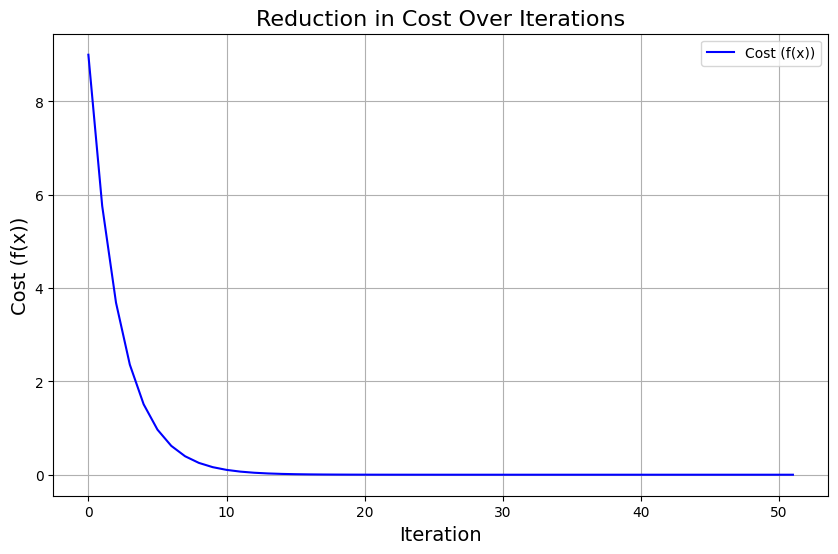

Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


In [46]:
## TASK-7 : Plot reduction in cost for each iteration
import matplotlib.pyplot as plt

# Define the function f(x) and its derivative df(x)
def f(x):
    # Example: Quadratic function f(x) = x^2
    return x**2

def df(x):
    # Derivative of f(x): df(x) = 2*x
    return 2 * x

# Gradient Descent Parameters
new_x = 3  # Initial guess
previous_x = 0  # To store the previous value of x
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Convergence criteria

# Lists to store the path of x, slopes, and cost for visualization
x_list = [new_x]
slope_list = [df(new_x)]
cost_list = [f(new_x)]  # Track the cost (f(x)) at each iteration

# Gradient Descent Loop
for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # Compute the gradient
    new_x = previous_x - step_multiplier * gradient  # Update x using the gradient
    step_size = abs(new_x - previous_x)  # Calculate the step size

    # Append the new values to the tracking lists
    x_list.append(new_x)
    slope_list.append(df(new_x))
    cost_list.append(f(new_x))  # Track the cost (f(x))

    # Check for convergence
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

# Plotting the reduction in cost
plt.figure(figsize=(10, 6))
plt.plot(range(len(cost_list)), cost_list, label="Cost (f(x))", color='blue')
plt.title("Reduction in Cost Over Iterations", fontsize=16)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost (f(x))", fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

# Print Results
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

In [47]:
## TASK-8 : Code the same things as they were done for the first two examples
# Define the function f(x) and its derivative df(x)
def f(x):
    # Example: Quadratic function f(x) = x^2
    return x**2

def df(x):
    # Derivative of f(x): df(x) = 2*x
    return 2 * x

# Gradient Descent Parameters
new_x = 3  # Initial guess
previous_x = 0  # To store the previous value of x
step_multiplier = 0.1  # Learning rate
precision = 0.00001  # Convergence criteria

# Lists to store the path of x and slopes for visualization
x_list = [new_x]
slope_list = [df(new_x)]

# Gradient Descent Loop
for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # Compute the gradient
    new_x = previous_x - step_multiplier * gradient  # Update x using the gradient
    step_size = abs(new_x - previous_x)  # Calculate the step size

    # Append the new values to the tracking lists
    x_list.append(new_x)
    slope_list.append(df(new_x))

    # Check for convergence
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

# Print Results
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 50
Local minimum occurs at: 3.425394462494306e-05
Slope or df(x) value at this point is: 6.850788924988612e-05
f(x) value or cost at this point is: 1.1733327223686654e-09


In [48]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [86]:
from sympy import symbols, diff

# Define symbols (variables)
a, b = symbols('a b')

# Define a simple cost function f(x, y) as an example
def f(x, y):
    return (x - 2)**2 + (y - 3)**2  # Example: MSE-like cost function

# Print the cost function
print('Our cost function f(x, y) is: ', f(a, b))

# Calculate and print the partial derivative with respect to b
print('Partial derivative wrt y (b) is: ', diff(f(a, b), b))

# Evaluate the function at x=1.8, y=1.0
print('Value of f(x,y) at x=1.8, y=1.0 is: ',
      f(a, b).evalf(subs={a: 1.8, b: 1.0}))  # Using a Python dictionary to substitute

# Evaluate the partial derivative with respect to a (x) at x=1.8, y=1.0
print('Value of partial derivative wrt x at x=1.8, y=1.0 is: ',
      diff(f(a, b), a).evalf(subs={a: 1.8, b: 1.0}))

Our cost function f(x, y) is:  (a - 2)**2 + (b - 3)**2
Partial derivative wrt y (b) is:  2*b - 6
Value of f(x,y) at x=1.8, y=1.0 is:  4.04000000000000
Value of partial derivative wrt x at x=1.8, y=1.0 is:  -0.400000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



Final slope (m): 1.1400063620111855e+67
Final intercept (b): 3.1576348221629744e+66
Final MSE: 8.869816200978236e+134


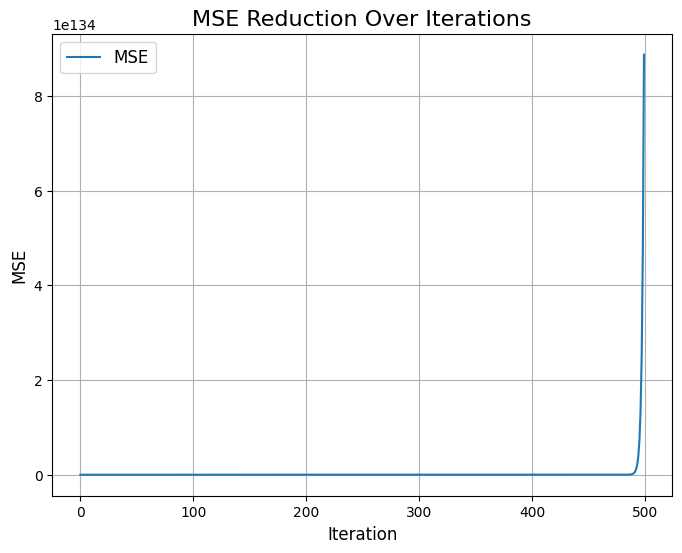

In [85]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the dataset
x = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([1.5, 3.5, 5.5, 7.5, 9.5])  # Target values

# Step 2: Initialize variables for gradient descent
multiplier = 0.1  # Step size or learning rate
max_iter = 500  # Maximum number of iterations
params = np.array([1.8, 1.0])  # Initial guess for parameters (slope, intercept)
mse_history = []  # To track the Mean Squared Error (MSE)

# Step 3: Define the cost function (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 4: Define the gradient descent update rules
def gradient_descent_step(x, y, params, multiplier):
    """
    Perform one gradient descent step.

    Parameters:
    - x: Input features
    - y: Target values
    - params: Array [m, b] representing slope and intercept
    - multiplier: Learning rate

    Returns:
    - Updated params and current MSE
    """
    m, b = params  # Unpack parameters
    n = len(y)
    y_pred = m * x + b
    m_gradient = -(2 / n) * np.sum(x * (y - y_pred))  # Partial derivative w.r.t. m
    b_gradient = -(2 / n) * np.sum(y - y_pred)  # Partial derivative w.r.t. b
    m -= multiplier * m_gradient  # Update slope
    b -= multiplier * b_gradient  # Update intercept
    params = np.array([m, b])  # Pack updated parameters
    return params, mse(y, y_pred)

# Step 5: Gradient Descent Process
for i in range(max_iter):
    params, current_mse = gradient_descent_step(x, y, params, multiplier)
    mse_history.append(current_mse)

# Step 6: Print results
final_m, final_b = params
print(f"Final slope (m): {final_m}")
print(f"Final intercept (b): {final_b}")
print(f"Final MSE: {mse_history[-1]}")

# Step 7: Plot MSE over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(max_iter), mse_history, label="MSE")
plt.title("MSE Reduction Over Iterations", fontsize=16)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [52]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return ## [REQUIRED]

def fpy(x, y):
    return ## [REQUIRED]

Final slope (m): -9.848574786640697e+67
Final intercept (b): -2.7278972934949135e+67
Final MSE: 6.619830123374662e+136


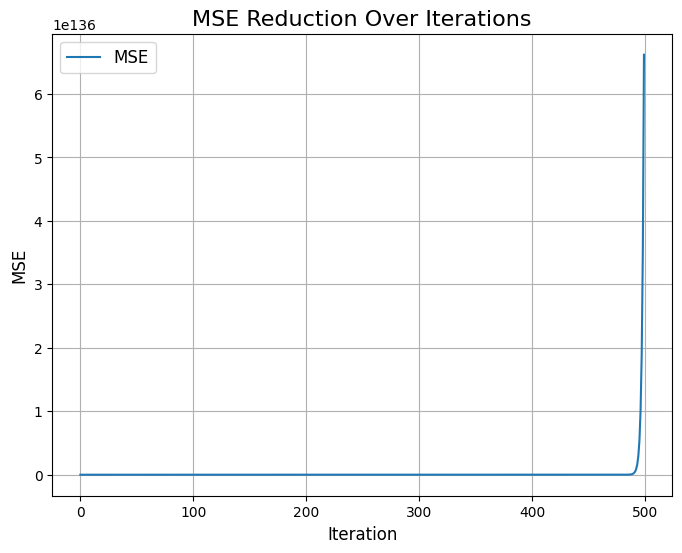

In [82]:
# Setup
multiplier = 0.1
max_iter = 500
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the dataset
x = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([1.5, 3.5, 5.5, 7.5, 9.5])  # Target values

# Step 2: Initialize variables for gradient descent
initial_slope = 0  # Initial slope (m)
initial_intercept = 0  # Initial intercept (b)
multiplier = 0.1  # Step size or learning rate
max_iter = 500  # Maximum number of iterations
mse_history = []  # To track the Mean Squared Error (MSE)

# Step 3: Define the cost function (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 4: Define the gradient descent update rules
def gradient_descent_step(x, y, m, b, multiplier):
    n = len(y)
    y_pred = m * x + b
    m_gradient = -(2 / n) * np.sum(x * (y - y_pred))  # Partial derivative w.r.t. m
    b_gradient = -(2 / n) * np.sum(y - y_pred)  # Partial derivative w.r.t. b
    m -= multiplier * m_gradient  # Update slope
    b -= multiplier * b_gradient  # Update intercept
    return m, b, mse(y, y_pred)  # Return updated parameters and current MSE

# Step 5: Gradient Descent Process
m = initial_slope
b = initial_intercept

for i in range(max_iter):
    m, b, current_mse = gradient_descent_step(x, y, m, b, multiplier)
    mse_history.append(current_mse)

# Step 6: Print results
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")
print(f"Final MSE: {mse_history[-1]}")

# Step 7: Plot MSE over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(max_iter), mse_history, label="MSE")
plt.title("MSE Reduction Over Iterations", fontsize=16)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()



```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

Final slope (m): 1.8067599689548863
Final intercept (b): 0.197657826790046
Final MSE: 0.08919483736842015


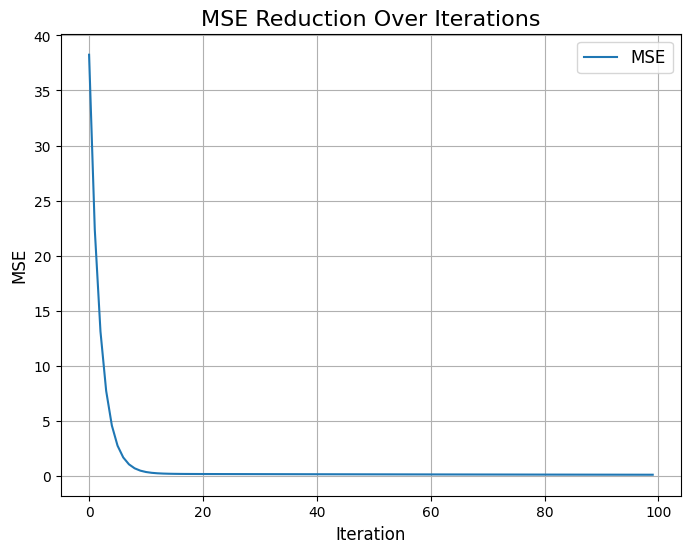

In [80]:
# Setup

# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the dataset (features and target values)
x = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([1.5, 3.5, 5.5, 7.5, 9.5])  # Target values

# Step 2: Initialize variables for gradient descent
initial_slope = 0  # Initial slope (m)
initial_intercept = 0  # Initial intercept (b)
learning_rate = 0.01  # Learning rate (gamma)
iterations = 100  # Number of iterations
mse_history = []  # To track the Mean Squared Error (MSE)

# Step 3: Define the cost function (MSE)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Step 4: Define the gradient descent update rules
def gradient_descent_step(x, y, m, b, learning_rate):
    n = len(y)
    y_pred = m * x + b
    m_gradient = -(2 / n) * np.sum(x * (y - y_pred))  # Partial derivative w.r.t. m
    b_gradient = -(2 / n) * np.sum(y - y_pred)  # Partial derivative w.r.t. b
    m -= learning_rate * m_gradient  # Update slope
    b -= learning_rate * b_gradient  # Update intercept
    return m, b, mse(y, y_pred)  # Return updated parameters and current MSE

# Step 5: Setup for visualization (empty MSE history for plotting)
m = initial_slope
b = initial_intercept

# Gradient Descent Process
for i in range(iterations):
    m, b, current_mse = gradient_descent_step(x, y, m, b, learning_rate)
    mse_history.append(current_mse)

# Step 6: Print results
print(f"Final slope (m): {m}")
print(f"Final intercept (b): {b}")
print(f"Final MSE: {mse_history[-1]}")

# Step 7: Plot MSE over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), mse_history, label="MSE")
plt.title("MSE Reduction Over Iterations", fontsize=16)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

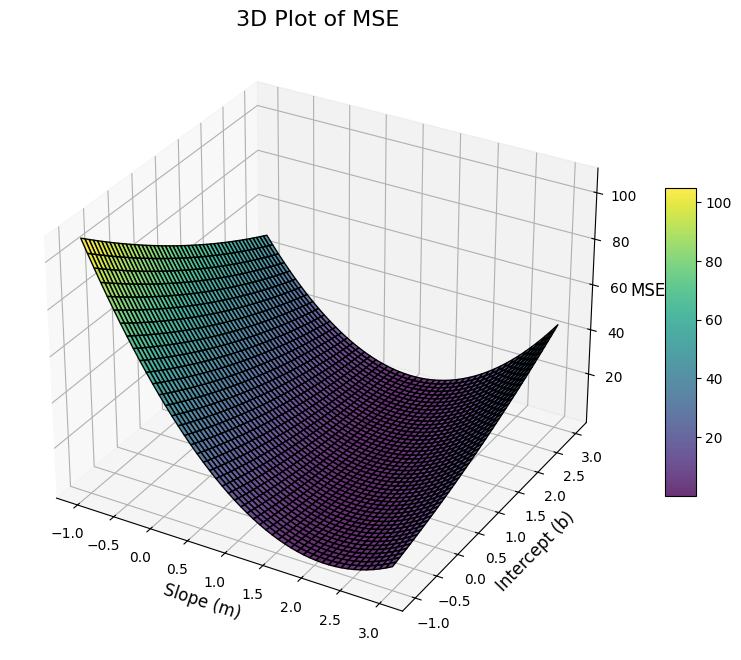

In [78]:
# Generating 3D Plot
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the Mean Squared Error (MSE) function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Simulated data
x = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([1.5, 3.5, 5.5, 7.5, 9.5])  # Target values

# Generate grid of values for m (slope) and b (intercept)
m_values = np.linspace(-1, 3, 50)  # Slope values
b_values = np.linspace(-1, 3, 50)  # Intercept values
M, B = np.meshgrid(m_values, b_values)  # Create grid

# Compute MSE for each combination of m and b
MSE = np.zeros_like(M)
for i in range(M.shape[0]):
    for j in range(M.shape[1]):
        y_pred = M[i, j] * x + B[i, j]
        MSE[i, j] = mse(y, y_pred)

# Plotting the 3D surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(M, B, MSE, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and Title
ax.set_title('3D Plot of MSE', fontsize=16)
ax.set_xlabel('Slope (m)', fontsize=12)
ax.set_ylabel('Intercept (b)', fontsize=12)
ax.set_zlabel('MSE', fontsize=12)

# Add color bar for the surface plot
fig.colorbar(surf, shrink=0.5, aspect=10)

# Show the plot
plt.show()

#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [56]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [57]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


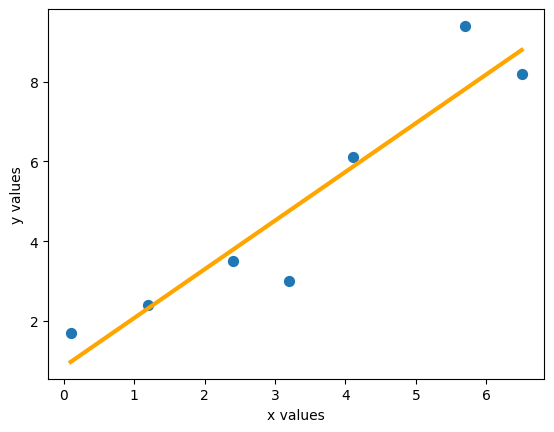

In [58]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [59]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [60]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [62]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [61]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)

#### Calc MSE using nested for loops

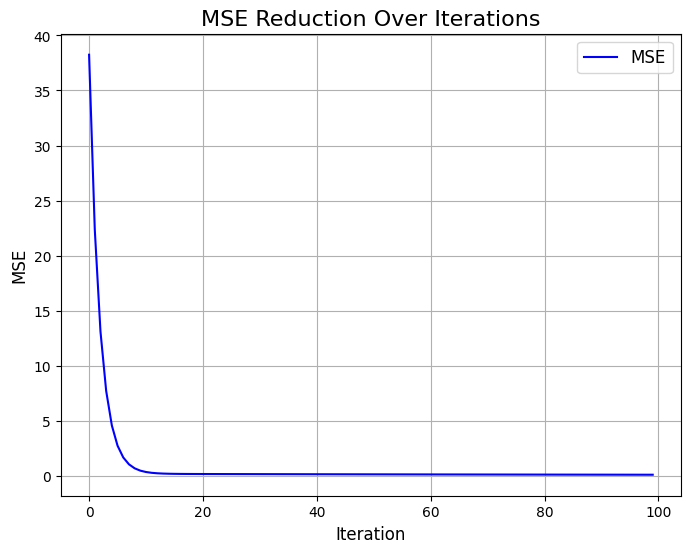

In [73]:
# Plotting MSE
import numpy as np
import matplotlib.pyplot as plt

# Define the Mean Squared Error (MSE) function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Simulated data
x = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([1.5, 3.5, 5.5, 7.5, 9.5])  # Target values

# Initialize parameters
m = 0  # Slope
b = 0  # Intercept

# Hyperparameters
learning_rate = 0.01
iterations = 100

# To track MSE over iterations
mse_history = []

# Gradient Descent
for i in range(iterations):
    # Make predictions
    y_pred = m * x + b

    # Calculate MSE and save to history
    current_mse = mse(y, y_pred)
    mse_history.append(current_mse)

    # Compute gradients
    m_gradient = -2 * np.mean(x * (y - y_pred))
    b_gradient = -2 * np.mean(y - y_pred)

    # Update parameters
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

# Plotting MSE
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), mse_history, color='blue', label='MSE')
plt.title('MSE Reduction Over Iterations', fontsize=16)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('MSE', fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

In [63]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

<ipython-input-63-050b7bf9b7b1>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plot_cost[i][j] = mse(y_5, y_hat)


Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


Min value of plot_cost 0.9483826526747164


TypeError: unravel_index() got an unexpected keyword argument 'dims'

#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [66]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [67]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


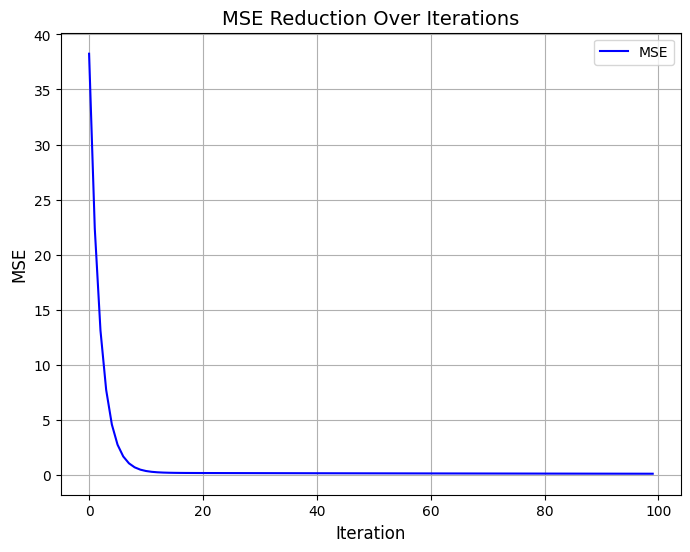

In [69]:
# Plotting MSE
import numpy as np
import matplotlib.pyplot as plt

# Example: Define the Mean Squared Error (MSE) function and its derivative
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mse_derivative(y_true, y_pred, x_values):
    n = len(y_true)
    return -(2/n) * np.dot(y_true - y_pred, x_values)

# Simulated Data
x = np.array([1, 2, 3, 4, 5])  # Features
y = np.array([1.5, 3.5, 5.5, 7.5, 9.5])  # Target values
m = 0  # Initial slope (weight)
b = 0  # Initial intercept (bias)

# Parameters
learning_rate = 0.01
iterations = 100
mse_history = []

# Gradient Descent for Linear Regression
for i in range(iterations):
    y_pred = m * x + b  # Predictions
    mse_value = mse(y, y_pred)  # Calculate MSE
    mse_history.append(mse_value)  # Track MSE over iterations

    # Compute gradients
    m_gradient = mse_derivative(y, y_pred, x)
    b_gradient = np.mean(-2 * (y - y_pred))

    # Update parameters
    m -= learning_rate * m_gradient
    b -= learning_rate * b_gradient

# Plotting MSE over iterations
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), mse_history, color='blue', label="MSE")
plt.title("MSE Reduction Over Iterations", fontsize=14)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()